In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gfdl = pd.read_csv('../Resources/GFDL_SPEAR_FULL_LDC.csv')
gfdl

,L,MON,LDC_SST_GFDL_SPEAR,LDC_SST_GFDL_SPEAR_ONETWO,LDC_SST_GFDL_SPEAR_THREE,LDC_SST_GFDL_SPEAR_FOUR
0,1.5,0000 1 Jan 1991,26.55804,25.49000,26.11018,28.04140
1,2.5,0000 1 Jan 1991,26.91037,25.65075,26.65816,28.03729
2,3.5,0000 1 Jan 1991,27.27886,24.75944,26.79709,28.24893
3,4.5,0000 1 Jan 1991,27.33729,23.42220,26.46144,28.41844
4,5.5,0000 1 Jan 1991,26.99391,22.20774,25.76022,28.34974
...,...,...,...,...,...,...
3595,6.5,0000 1 Dec 2020,27.05779,22.91640,25.85047,28.38735
3596,7.5,0000 1 Dec 2020,26.45643,21.83344,25.02918,28.11666
3597,8.5,0000 1 Dec 2020,25.88036,21.09882,24.38621,27.79587
3598,9.5,0000 1 Dec 2020,25.57233,20.86703,24.14325,27.55117


In [204]:
gfdl['MON'] = pd.to_datetime(gfdl['MON'], format = '%H%M %d %b %Y')
gfdl['START'] = gfdl['MON'].dt.month
gfdl['TARGET'] = ((gfdl['START'] + gfdl['L']).astype(int))%12
gfdl['TARGET'] = gfdl['TARGET'].apply(lambda x: 12 if x == 0 else x)
gfdl['TAR'] = gfdl.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
gfdl['TAR'] = gfdl.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
gfdl['SZN'] = gfdl['TARGET'].map(month_to_season)

gfdl = gfdl[['L', 'MON','TAR','SZN', 'LDC_SST_GFDL_SPEAR']]

gfdl

,L,MON,TAR,SZN,LDC_SST_GFDL_SPEAR
0,1.5,1991-01-01,1991-02-15,JFM,26.55804
1,2.5,1991-01-01,1991-03-15,FMA,26.91037
2,3.5,1991-01-01,1991-04-15,MAM,27.27886
3,4.5,1991-01-01,1991-05-15,AMJ,27.33729
4,5.5,1991-01-01,1991-06-15,MJJ,26.99391
...,...,...,...,...,...
3595,6.5,2020-12-01,2021-06-15,MJJ,27.05779
3596,7.5,2020-12-01,2021-07-15,JJA,26.45643
3597,8.5,2020-12-01,2021-08-15,JAS,25.88036
3598,9.5,2020-12-01,2021-09-15,ASO,25.57233


In [205]:
gfdl_temp = gfdl.copy()
filter_year = 1991
filter_month = 2
filter_day = 15

# Query the DataFrame
filtered_gfdl_temp = gfdl_temp[
    (gfdl_temp['TAR'].dt.year == filter_year) &
    (gfdl_temp['TAR'].dt.month == filter_month) &
    (gfdl_temp['TAR'].dt.day == filter_day)
]

# Display the filtered DataFrame
filtered_gfdl_temp

,L,MON,TAR,SZN,LDC_SST_GFDL_SPEAR
0,1.5,1991-01-01,1991-02-15,JFM,26.55804


In [206]:
#input method: 1993 JAS -> yr = 1993, mon = 8, day = 15
dict = {"year" : 1993, "month" : 8, "day" : 15}


def gfdl_onset_finder(dict):

    gfdl_temp = gfdl.copy()

    # Query the DataFrame
    gfdl_onset = gfdl_temp[
        (gfdl_temp['TAR'].dt.year == dict["year"]) &
        (gfdl_temp['TAR'].dt.month == dict["month"]) &
        (gfdl_temp['TAR'].dt.day == dict["day"])
    ]
    return gfdl_onset
    

gfdl_onset = gfdl_onset_finder(dict)
gfdl_onset

,L,MON,TAR,SZN,LDC_SST_GFDL_SPEAR
219,10.5,1992-10-01,1993-08-15,JAS,25.55508
228,9.5,1992-11-01,1993-08-15,JAS,25.53442
237,8.5,1992-12-01,1993-08-15,JAS,25.45776
246,7.5,1993-01-01,1993-08-15,JAS,25.64568
255,6.5,1993-02-01,1993-08-15,JAS,25.45813
264,5.5,1993-03-01,1993-08-15,JAS,25.69978
273,4.5,1993-04-01,1993-08-15,JAS,25.88160
282,3.5,1993-05-01,1993-08-15,JAS,25.89240
291,2.5,1993-06-01,1993-08-15,JAS,26.05597
300,1.5,1993-07-01,1993-08-15,JAS,25.85261


In [207]:
obs = pd.read_csv('../Resources/observed_onset.csv')
obs.head(20)
#identify first ENSO event as MJJ of 1991 -> Center at Jun 15, 1991

,YR,MON,DAY,SZN,OBS_NINO3.4_L3,OBS_ANOM_L3,OBS_PHASE,obs_group
0,1991,1,15,DJF,27.016667,0.386667,neutral,1
1,1991,2,15,JFM,27.140000,0.280000,neutral,1
2,1991,3,15,FMA,27.466667,0.180000,neutral,1
3,1991,4,15,MAM,27.843333,0.160000,neutral,1
4,1991,5,15,AMJ,28.153333,0.323333,neutral,1
5,1991,6,15,MJJ,28.166667,0.513333,warm,2
6,1991,7,15,JJA,27.943333,0.653333,warm,2
7,1991,8,15,JAS,27.573333,0.620000,warm,2
8,1991,9,15,ASO,27.416667,0.653333,warm,2
9,1991,10,15,SON,27.540000,0.826667,warm,2


In [208]:
dict = {"year" : 1991, "month" : 6, "day" : 15}
gfdl_onset_finder(dict)

,L,MON,TAR,SZN,LDC_SST_GFDL_SPEAR
4,5.5,1991-01-01,1991-06-15,MJJ,26.99391
13,4.5,1991-02-01,1991-06-15,MJJ,27.00818
22,3.5,1991-03-01,1991-06-15,MJJ,27.12574
31,2.5,1991-04-01,1991-06-15,MJJ,26.89672
40,1.5,1991-05-01,1991-06-15,MJJ,27.43413


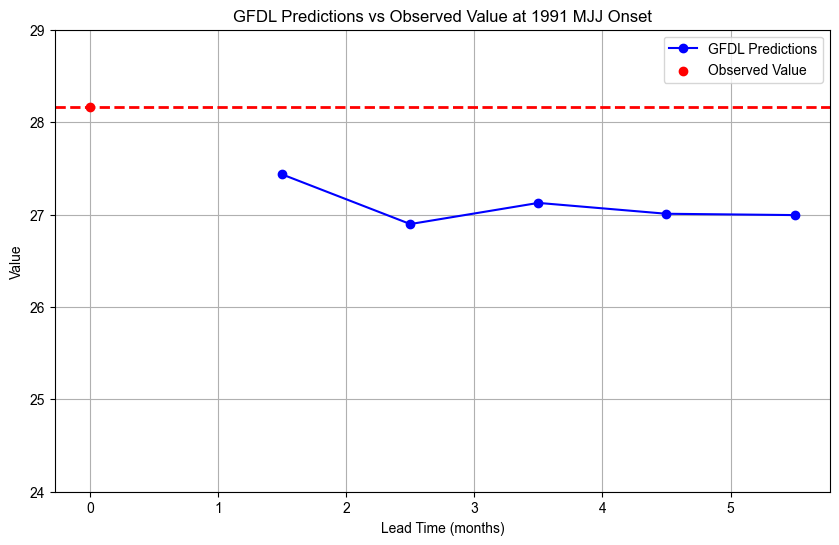

In [209]:
observed_value = 28.166667
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5]
gfdl_predictions = [27.43413, 26.89672, 27.12574, 27.00818, 26.99391]
data = pd.DataFrame({
    'L': lead_times,
    'gfdl': gfdl_predictions
})


# Plotting
plt.figure(figsize=(10, 6))

# Plot the model predictions
plt.plot(data['L'], data['gfdl'], marker='o', linestyle='-', color='b', label='GFDL Predictions')

# Highlight the observed data point
plt.scatter([0], [observed_value], color='r', zorder=5, label='Observed Value')

# Add labels and title
plt.xlabel('Lead Time (months)')
plt.ylabel('Value')
plt.title('GFDL Predictions vs Observed Value at 1991 MJJ Onset')
plt.axhline(y=observed_value, color='r', linestyle='--', linewidth=2) # Optional: add horizontal line at observed value
plt.ylim(ymin=24, ymax=29)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [210]:
#import obs seasonal mean data


#identify peak of first ENSO event as of DJF 1992 -> Center at Jan 15, 1992
lead_times = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
target = {"year" : 2018, "month" :9, "day" : 15}
data = gfdl_onset_finder(target)
data

,L,MON,TAR,SZN,LDC_SST_GFDL_SPEAR
3229,10.5,2017-11-01,2018-09-15,ASO,25.83697
3238,9.5,2017-12-01,2018-09-15,ASO,25.67574
3247,8.5,2018-01-01,2018-09-15,ASO,26.00937
3256,7.5,2018-02-01,2018-09-15,ASO,26.01567
3265,6.5,2018-03-01,2018-09-15,ASO,26.09151
3274,5.5,2018-04-01,2018-09-15,ASO,26.28632
3283,4.5,2018-05-01,2018-09-15,ASO,26.27201
3292,3.5,2018-06-01,2018-09-15,ASO,26.61941
3301,2.5,2018-07-01,2018-09-15,ASO,27.05198
3310,1.5,2018-08-01,2018-09-15,ASO,27.09763


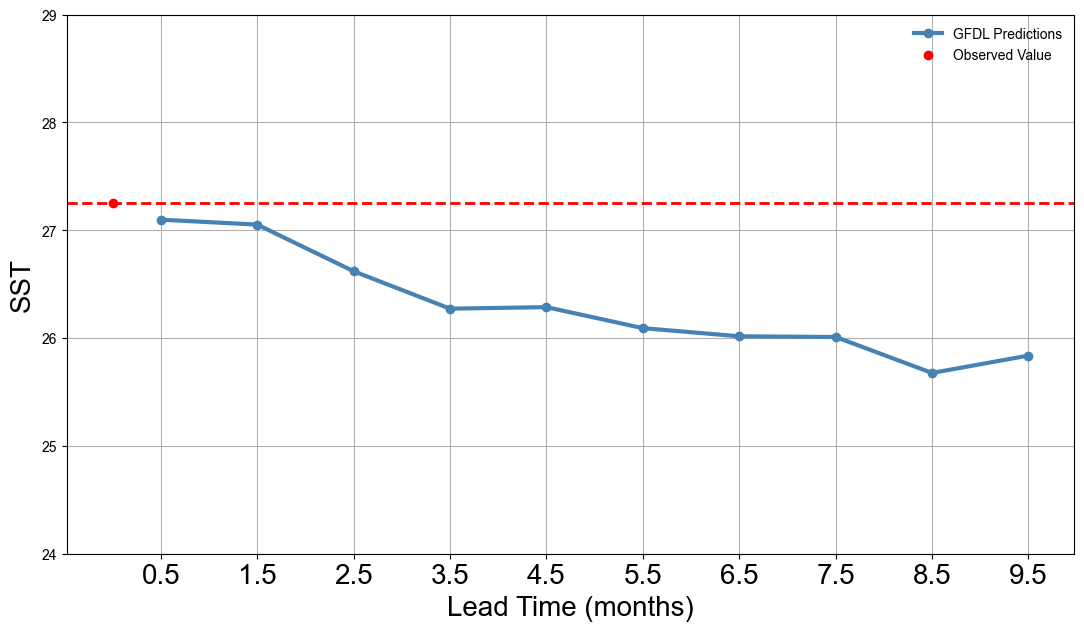

In [211]:
#create dataframe using data found in gfdl_onset_data

#find obs data using same date in dict
filtered_row = obs[(obs["YR"] == target["year"]) & (obs["MON"] == target["month"]) & (obs["DAY"] == target["day"])]
if not filtered_row.empty:
    observed_value = filtered_row["OBS_NINO3.4_L3"].values[0]


# Plotting
plt.figure(figsize=(13, 7))

# Plot the model predictions
plt.plot(data['L']-1, data['LDC_SST_GFDL_SPEAR'],marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue', label='GFDL Predictions')

# Highlight the observed data point
plt.scatter([0], [observed_value], color='r', zorder=5, label='Observed Value')
#plt.scatter([0], [observed_value], color='black', zorder=5, label='Observed Seasonal Mean, 1991-2020')

# Add labels and title
plt.xlabel('Lead Time (months)',size = 20)
plt.ylabel('SST', size = 20)
plt.xticks(lead_times, size = 20)
#plt.title('GFDL Predictions vs Observed Value at 1992 DJF Warm Peak', size = 24)
plt.axhline(y=observed_value, color='r', linestyle='--', linewidth=2) # Optional: add horizontal line at observed value
plt.ylim(ymin=24, ymax=29)
plt.legend(frameon=False)

# Show the plot
plt.grid(True)
plt.show()

In [212]:
# Create separate DataFrames for each phase 
warm_obs = obs[obs['OBS_PHASE'] == 'warm']
neutral_obs = obs[obs['OBS_PHASE'] == 'neutral']
cold_obs = obs[obs['OBS_PHASE'] == 'cold']

warm_obs

,YR,MON,DAY,SZN,OBS_NINO3.4_L3,OBS_ANOM_L3,OBS_PHASE,obs_group
5,1991,6,15,MJJ,28.166667,0.513333,warm,2
6,1991,7,15,JJA,27.943333,0.653333,warm,2
7,1991,8,15,JAS,27.573333,0.620000,warm,2
8,1991,9,15,ASO,27.416667,0.653333,warm,2
9,1991,10,15,SON,27.540000,0.826667,warm,2
...,...,...,...,...,...,...,...,...
337,2019,2,15,JFM,27.580000,0.723333,warm,42
338,2019,3,15,FMA,27.996667,0.713333,warm,42
339,2019,4,15,MAM,28.336667,0.660000,warm,42
340,2019,5,15,AMJ,28.366667,0.540000,warm,42


In [213]:
#this code iterates through the warm SZNs (according to the observed data) and selects for those target seasons in the gfdl spear LDC data

warm_szn_dict = {}
for index, row in warm_obs.iterrows():
    
    key = index
    warm_szn_dict[key] = {
        "year": row['YR'],
        "month": row['MON'],
        "day": row['DAY']
    }

dataframes = []
for key in warm_szn_dict:
    date_dict = warm_szn_dict[key]
    result_df = gfdl_onset_finder(date_dict)
    dataframes.append(result_df)
warm_data = pd.concat(dataframes, ignore_index=True)
warm_data

,L,MON,TAR,SZN,LDC_SST_GFDL_SPEAR
0,5.5,1991-01-01,1991-06-15,MJJ,26.99391
1,4.5,1991-02-01,1991-06-15,MJJ,27.00818
2,3.5,1991-03-01,1991-06-15,MJJ,27.12574
3,2.5,1991-04-01,1991-06-15,MJJ,26.89672
4,1.5,1991-05-01,1991-06-15,MJJ,27.43413
...,...,...,...,...,...
900,5.5,2019-01-01,2019-06-15,MJJ,27.47253
901,4.5,2019-02-01,2019-06-15,MJJ,27.54560
902,3.5,2019-03-01,2019-06-15,MJJ,28.19666
903,2.5,2019-04-01,2019-06-15,MJJ,28.25675


In [214]:
neutral_szn_dict = {}
for index, row in neutral_obs.iterrows():
    
    key = index
    neutral_szn_dict[key] = {
        "year": row['YR'],
        "month": row['MON'],
        "day": row['DAY']
    }

dataframes = []
for key in neutral_szn_dict:
    date_dict = neutral_szn_dict[key]
    result_df = gfdl_onset_finder(date_dict)
    dataframes.append(result_df)
neutral_data = pd.concat(dataframes, ignore_index=True)
neutral_data

,L,MON,TAR,SZN,LDC_SST_GFDL_SPEAR
0,1.5,1991-01-01,1991-02-15,JFM,26.55804
1,2.5,1991-01-01,1991-03-15,FMA,26.91037
2,1.5,1991-02-01,1991-03-15,FMA,27.14621
3,3.5,1991-01-01,1991-04-15,MAM,27.27886
4,2.5,1991-02-01,1991-04-15,MAM,27.44106
...,...,...,...,...,...
1595,5.5,2020-02-01,2020-07-15,JJA,26.40191
1596,4.5,2020-03-01,2020-07-15,JJA,26.49539
1597,3.5,2020-04-01,2020-07-15,JJA,26.47106
1598,2.5,2020-05-01,2020-07-15,JJA,26.76817


In [215]:
cold_szn_dict = {}
for index, row in cold_obs.iterrows():
    
    key = index
    cold_szn_dict[key] = {
        "year": row['YR'],
        "month": row['MON'],
        "day": row['DAY']
    }

dataframes = []
for key in cold_szn_dict:
    date_dict = cold_szn_dict[key]
    result_df = gfdl_onset_finder(date_dict)
    dataframes.append(result_df)
cold_data = pd.concat(dataframes, ignore_index=True)
cold_data

,L,MON,TAR,SZN,LDC_SST_GFDL_SPEAR
0,10.5,1994-10-01,1995-08-15,JAS,25.66215
1,9.5,1994-11-01,1995-08-15,JAS,25.52513
2,8.5,1994-12-01,1995-08-15,JAS,25.48767
3,7.5,1995-01-01,1995-08-15,JAS,25.26264
4,6.5,1995-02-01,1995-08-15,JAS,25.25708
...,...,...,...,...,...
1035,5.5,2020-07-01,2020-12-15,NDJ,25.29629
1036,4.5,2020-08-01,2020-12-15,NDJ,25.71149
1037,3.5,2020-09-01,2020-12-15,NDJ,25.70903
1038,2.5,2020-10-01,2020-12-15,NDJ,25.64391


#the hot cold and neutral adds up to 3545, 55 short of 3600. This is because we do not calculate for targets beyond dec 2020

In [216]:
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
gfdl_warm_mean = warm_data.groupby(['SZN'])['LDC_SST_GFDL_SPEAR'].mean().reset_index()
gfdl_warm_mean['SZN'] = pd.Categorical(gfdl_warm_mean['SZN'], categories=season_order, ordered=True)
gfdl_warm_mean = gfdl_warm_mean.sort_values('SZN')

gfdl_neutral_mean = neutral_data.groupby(['SZN'])['LDC_SST_GFDL_SPEAR'].mean().reset_index()
gfdl_neutral_mean['SZN'] = pd.Categorical(gfdl_neutral_mean['SZN'], categories=season_order, ordered=True)
gfdl_neutral_mean = gfdl_neutral_mean.sort_values('SZN')

gfdl_cold_mean = cold_data.groupby(['SZN'])['LDC_SST_GFDL_SPEAR'].mean().reset_index()
gfdl_cold_mean['SZN'] = pd.Categorical(gfdl_cold_mean['SZN'], categories=season_order, ordered=True)
gfdl_cold_mean = gfdl_cold_mean.sort_values('SZN')

gfdl_warm_mean

,SZN,LDC_SST_GFDL_SPEAR
5,JFM,27.265509
3,FMA,27.686625
7,MAM,28.058856
0,AMJ,27.875294
8,MJJ,27.560801
6,JJA,27.150596
4,JAS,26.868345
1,ASO,26.607278
11,SON,26.824539
10,OND,27.027229


In [223]:
gfdl_warm_by_lead = warm_data.groupby(['SZN','L'])['LDC_SST_GFDL_SPEAR'].mean().reset_index()
gfdl_warm_by_lead['SZN'] = pd.Categorical(gfdl_warm_by_lead['SZN'], categories=season_order, ordered=True)
gfdl_warm_by_lead = gfdl_warm_by_lead.sort_values('SZN')
gfdl_warm_by_lead 

,SZN,L,LDC_SST_GFDL_SPEAR
59,JFM,10.5,26.752247
50,JFM,1.5,27.607973
51,JFM,2.5,27.527974
52,JFM,3.5,27.405158
53,JFM,4.5,27.330443
...,...,...,...
24,DJF,5.5,27.284152
25,DJF,6.5,27.124438
26,DJF,7.5,26.909847
27,DJF,8.5,26.827205


In [227]:
lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
gfdl_warm_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_warm_by_lead[gfdl_warm_by_lead ['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_warm_dfs[f'lead{lead}'] = filtered_gfdl
    
gfdl_warm_dfs['lead3']

,SZN,L,LDC_SST_GFDL_SPEAR
0,NDJ,3.5,27.480382
1,DJF,3.5,27.371486
2,JFM,3.5,27.405158
3,FMA,3.5,27.783081
4,MAM,3.5,28.082574
5,AMJ,3.5,27.897740
6,MJJ,3.5,27.648512
7,JJA,3.5,27.167628
8,JAS,3.5,27.082400
9,ASO,3.5,26.907904


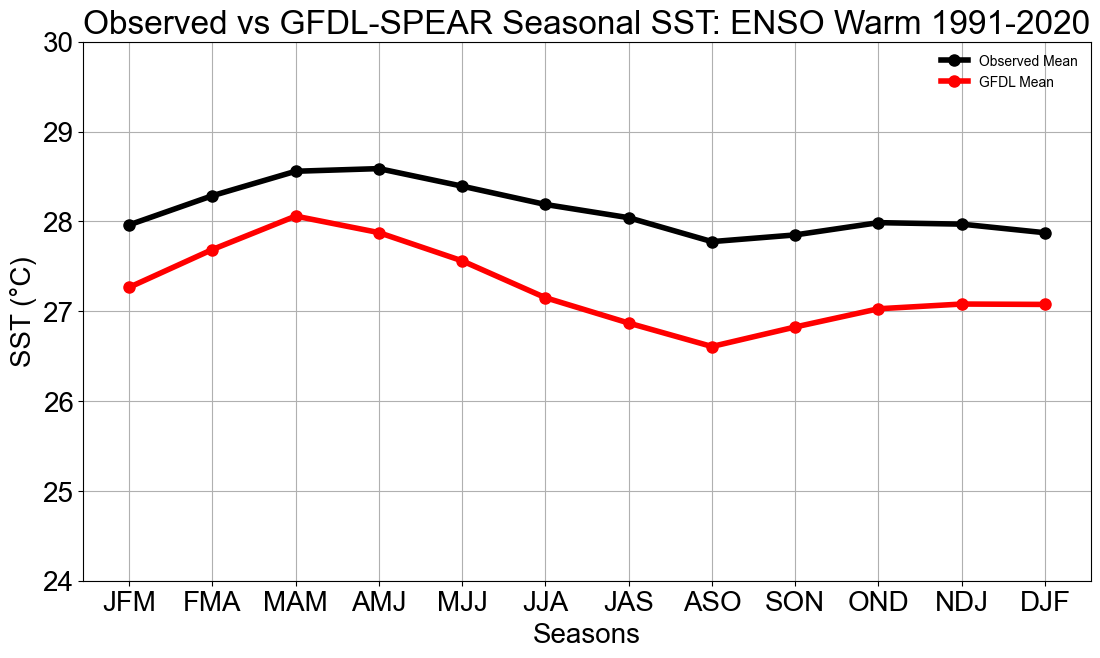

In [217]:
warm_mean_obs = pd.read_csv('../Resources/warm_mean_obs.csv')
neutral_mean_obs = pd.read_csv('../Resources/neutral_mean_obs.csv')
cold_mean_obs = pd.read_csv('../Resources/cold_mean_obs.csv')
gfdl_warm_mean.to_csv('../Resources/gfdl_warm_mean.csv', index=False)
gfdl_neutral_mean.to_csv('../Resources/gfdl_neutral_mean.csv', index=False)
gfdl_cold_mean.to_csv('../Resources/gfdl_cold_mean.csv', index=False)

def warm_phase_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(warm_mean_obs['SZN'], warm_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'Observed Mean')
    plt.plot(gfdl_warm_mean['SZN'], gfdl_warm_mean[f'LDC_SST_GFDL_SPEAR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL Mean')
    
    # Customize the plot
    plt.title(f'Observed vs GFDL-SPEAR Seasonal SST: ENSO Warm 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    plt.savefig(f'../Plots/Obs/warm_gfdl_and_observed_mean.png', format='png')
    # Show the plot
    plt.show()

warm_phase_visualizer()


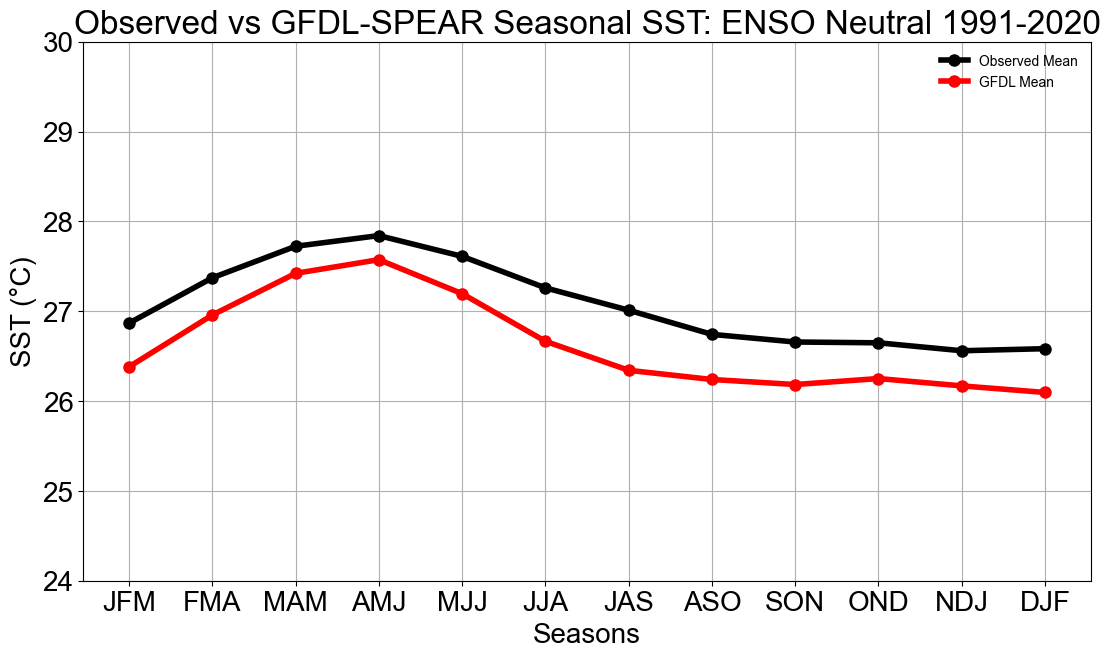

In [218]:
def neutral_phase_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(neutral_mean_obs['SZN'], neutral_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'Observed Mean')
    plt.plot(gfdl_neutral_mean['SZN'], gfdl_neutral_mean[f'LDC_SST_GFDL_SPEAR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL Mean')
    
    # Customize the plot
    plt.title(f'Observed vs GFDL-SPEAR Seasonal SST: ENSO Neutral 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    plt.savefig(f'../Plots/Obs/neutral_gfdl_and_observed_mean.png', format='png')
    # Show the plot
    plt.show()

neutral_phase_visualizer()

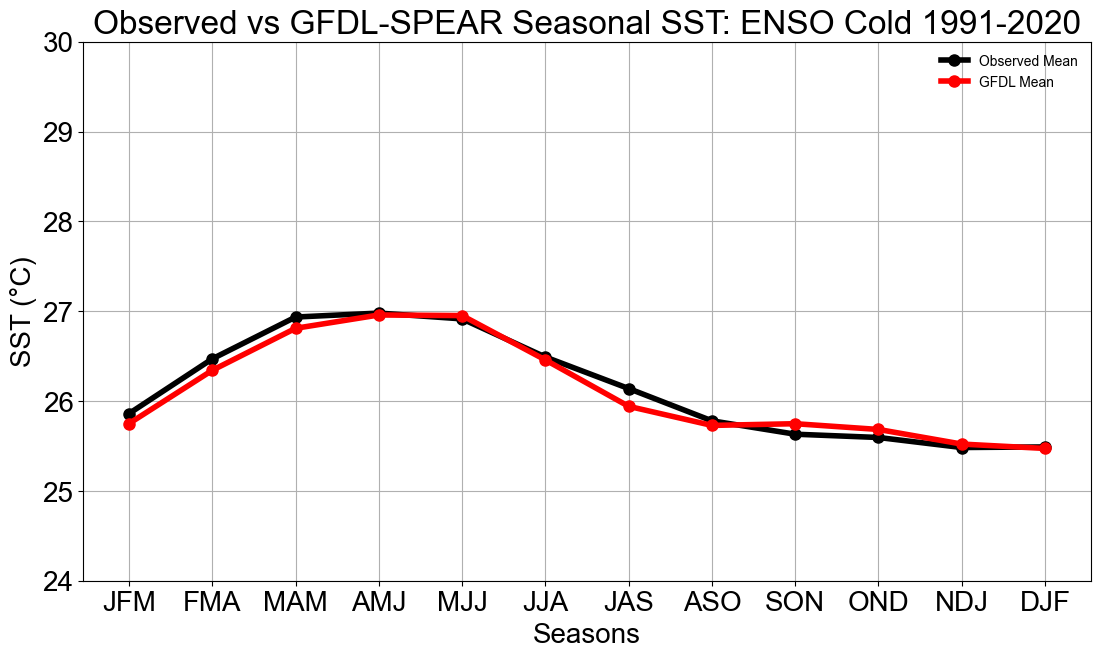

In [219]:
def cold_phase_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(cold_mean_obs['SZN'], cold_mean_obs[f'OBS_MEAN_NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'Observed Mean')
    plt.plot(gfdl_cold_mean['SZN'], gfdl_cold_mean[f'LDC_SST_GFDL_SPEAR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL Mean')
    
    # Customize the plot
    plt.title(f'Observed vs GFDL-SPEAR Seasonal SST: ENSO Cold 1991-2020', size = 24)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax = 30)
    plt.savefig(f'../Plots/Obs/cold_gfdl_and_observed_mean.png', format='png')
    # Show the plot
    plt.show()

cold_phase_visualizer()